In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('merge_data_update.csv')
tdata = data.copy()

tdata.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

## BsmtUnfSF - Keep, change the 1 null to 0.

In [33]:
sum(tdata.BsmtUnfSF.isnull())
tdata[tdata.BsmtUnfSF.isnull()]
# Filling in missing value with 0
tdata['BsmtUnfSF'].fillna(value=0, inplace=True)

## TotalBsmtSF  - Keep, change the 1 null to 0.


In [34]:
sum(tdata.TotalBsmtSF.isnull())
tdata[tdata.TotalBsmtSF.isnull()] #classic row 912
# Filling in missing value with 0
tdata['TotalBsmtSF'].fillna(value=0, inplace=True)

## GarageType -
carport into none, built-in, basement into attached, two-type into detached (possibly binary Y/N)- none for nas


In [35]:
#nas to none as per kaggle dict
sum(tdata.GarageType.isnull())
tdata['GarageType'].fillna(value='None', inplace=True)
sum(tdata.GarageType.isnull())


0

In [36]:
tdata.GarageType.value_counts()

Attchd     1527
Detchd      716
BuiltIn     153
None        127
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64

In [37]:
#whittle categories
tdata.GarageType[tdata.GarageType=="CarPort"]='None'
tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
tdata.GarageType[tdata.GarageType=="2Types"]='Detchd'
tdata.GarageType.value_counts()

<ipython-input-37-4d8f79e8676c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="CarPort"]='None'
<ipython-input-37-4d8f79e8676c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="BuiltIn"]='Attchd'
<ipython-input-37-4d8f79e8676c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageType[tdata.GarageType=="Basment"]='Attchd'
<ipython-input-37-4d8f79e8676c>:5

Attchd    1707
Detchd     737
None       136
Name: GarageType, dtype: int64

In [38]:
#as discovered during garagefinish,there are nine nas that would suggest no garage hpwever they have garage data in all other garage cols so assigning them attched aka the mode
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'
sum( (tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')) 
tdata.GarageType=tdata.GarageType.astype("category")

<ipython-input-38-ffd15f8ee67a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageType'][(tdata['GarageFinish'].isna()==False) &(tdata['GarageType']=='None')]='Attchd'


In [39]:
# Dummifying, dropping attchd column.
GarageTypedummy = pd.get_dummies(tdata['GarageType'], prefix='GarageType', prefix_sep='_').drop('GarageType_Attchd',1)
tdata = pd.concat([tdata, GarageTypedummy], axis=1)


In [40]:
tdata

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA,GarageType_Detchd,GarageType_None
0,0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,1.0,1.0,37300.0,0.0,111700.0,NaN,NaN,856.0,1,0
1,1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,1.0,1.0,43500.0,0.0,130600.0,NaN,NaN,1049.0,0,0
2,2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,1.0,1.0,41100.0,0.0,123200.0,NaN,NaN,1001.0,1,0
3,3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,1.0,1.0,31100.0,0.0,93300.0,NaN,4850.0,1039.0,1,0
4,4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,1.0,1.0,64300.0,0.0,192800.0,NaN,NaN,1665.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,1.0,1.0,34600.0,0.0,103900.0,4850.0,4850.0,952.0,1,0
2576,2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,1.0,1.0,46300.0,0.0,138800.0,NaN,NaN,1733.0,0,0
2577,2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,1.0,1.0,45800.0,0.0,137400.0,NaN,NaN,2002.0,1,0
2578,2578,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,1.0,1.0,66300.0,0.0,198900.0,4850.0,4850.0,1842.0,0,0


## HasGarage -create binary garage col- 1=yes garage

In [41]:
#tdata['HasGarage'] = np.where(tdata['GarageType']!= 'None', 1, 0)

In [42]:
#check its worked
#sum(tdata['HasGarage']==0)

## GarageFinish

In [43]:
tdata['GarageFinish'].value_counts()
sum(tdata['GarageFinish'].isna())
#sum( (tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')) 

129

In [44]:
tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'

<ipython-input-44-ae0553da1aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.GarageFinish[(tdata['GarageFinish'].isna()) &(tdata['GarageType']!='None')]='Unf'


In [45]:
tdata['GarageFinish'].value_counts()

Unf    1114
RFn     718
Fin     621
Name: GarageFinish, dtype: int64

In [46]:
tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'
tdata['GarageFinish'].value_counts()
tdata.GarageFinish=tdata.GarageFinish.astype("category")
GarageFinishdummy = pd.get_dummies(tdata['GarageFinish'], prefix='GarageFinish', prefix_sep='_').drop('GarageFinish_Unf',1)
tdata = pd.concat([tdata, GarageFinishdummy], axis=1)

<ipython-input-46-058c3fab6866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageFinish'][(tdata['GarageFinish'].isna())]='None'


## GarageCars- keep as is

In [47]:
sum(tdata['GarageCars'].isna())

1

In [48]:
tdata['GarageFinish'][tdata['GarageCars'].isna()]
#one na which has features for garage type so we gonna give it the avrg number of cars 
tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())

<ipython-input-48-c5fc05e22339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageCars'][tdata['GarageCars'].isna()]=round(tdata['GarageCars'].mean())


In [49]:
sum(tdata['GarageCars'].isna())

0

## GarageArea - if missing-> replace w mean of those w garages else 0 if no garage duh 

In [50]:
sum( (tdata['GarageArea'].isna()) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']==0) &(tdata['GarageType']!='None'))
sum( (tdata['GarageArea']!=0) &(tdata['GarageType']=='None'))

0

In [51]:
#one w a garage but no area 
tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())

<ipython-input-51-0f7f5f9bc4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['GarageArea'][(tdata['GarageArea'].isna()) &(tdata['GarageType']!='None')]=round(tdata['GarageArea'][tdata['GarageArea']!=0].mean())


In [52]:
sum(tdata['GarageArea'].isna())

0

## PavedDrive - binary, y=0 n=1 as per drop maj class- follow up w luke

In [53]:
sum(tdata['PavedDrive'].isna())

0

In [54]:
#tdata[tdata['PavedDrive']=="Y"]
tdata['UnpavedDrive'] = np.where(tdata['PavedDrive']!= 'Y', 1, 0)

In [55]:
tdata=tdata.drop('PavedDrive',1)

In [56]:
#tdata.PavedDrive

## WoodDeckSF - binarize

In [57]:
sum(tdata['WoodDeckSF'].isna())
sum(tdata['WoodDeckSF']>0)
tdata['WoodDeckBinary']=tdata['WoodDeckSF']>0
tdata=tdata.drop('WoodDeckSF',1)

In [58]:
#tdata.WoodDeckSF

AttributeError: 'DataFrame' object has no attribute 'WoodDeckSF'

## Create Has Porch


In [59]:
tdata['HasPorch']=((tdata['ScreenPorch']+tdata['OpenPorchSF']+tdata['3SsnPorch']+tdata['EnclosedPorch'])>0).astype(int)


In [60]:
tdata=tdata.drop('ScreenPorch',1)
tdata=tdata.drop('OpenPorchSF',1)
tdata=tdata.drop('3SsnPorch',1)
tdata=tdata.drop('EnclosedPorch',1)

## Fence- Binarize

In [61]:
sum(tdata.Fence.isna())

2055

In [62]:
tdata['Fence'][tdata['Fence'].isna()]='None'

<ipython-input-62-59ec50b9ce32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['Fence'][tdata['Fence'].isna()]='None'


In [63]:
tdata['FenceBinary']=(tdata['Fence']!='None').astype(int)


In [64]:
sum(tdata['FenceBinary']==0)

2055

In [65]:
tdata=tdata.drop('Fence',1)

## MoSold

In [66]:
sum(tdata.MoSold.isna())

0

In [67]:
tdata.MoSold=tdata.MoSold.astype("category")

## OverallQual

In [68]:
sum(tdata.OverallQual.isna())

0

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

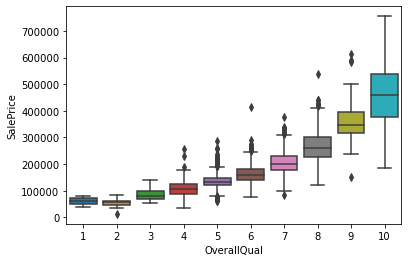

In [69]:
sns.boxplot(x='OverallQual',y='SalePrice',data=tdata)

<AxesSubplot:xlabel='OverallQual', ylabel='OverallCond'>

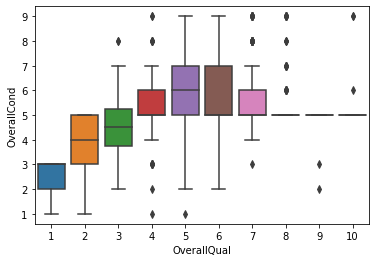

In [70]:
sns.boxplot(x='OverallQual',y='OverallCond',data=tdata)

## OverallCond- 
-said we should binarize but going to do that in new col bc i actually like this as is now ...
-do we think this should be ordinal or nominal categorical? 

In [71]:
sum(tdata.OverallCond.isna())

0

In [72]:
tdata.OverallCond.value_counts()

5    1402
6     498
7     360
8     140
4      88
9      41
3      39
2       8
1       4
Name: OverallCond, dtype: int64

(array([   4.,    8.,   39.,   88.,    0., 1402.,  498.,  360.,  140.,
          41.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

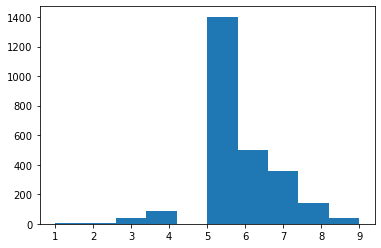

In [73]:
plt.hist(tdata.OverallCond)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

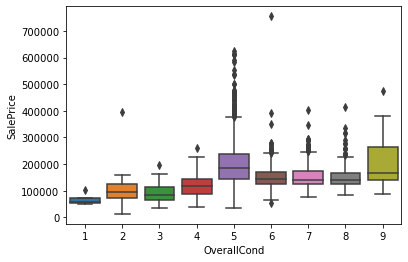

In [74]:
sns.boxplot(x='OverallCond',y='SalePrice',data=tdata)

## OverallCondBinary
-below average y or no 

In [75]:
tdata['OverallCondBinary']=(tdata['OverallCond']<5).astype(int)
tdata=tdata.drop('OverallCond',1)

## GeoRefNo

In [76]:
sum(tdata.GeoRefNo.isna())

21

In [77]:
#nothing I can do about these nas rn- will become an issue for computing distance
#to college. at that time we can impute the avrg distance or since small # instances do manually if
#they have an address

#themissing21 = indices of these rows  in case want to drop 

## Prop_Addr

In [78]:
sum((tdata.Prop_Addr.isna()))#&(tdata.GeoRefNo.isna()))
#same 21 w no address- nothing can do bout that 


21

## SchD_S
-binary- 1 means school dist 5 else dist 1

In [79]:
sum((tdata.SchD_S.isna()) &(tdata.GeoRefNo.isna()))
#same 21 w no address- impute mode

21

In [80]:
tdata.SchD_S.value_counts()

1.0    2229
5.0     330
Name: SchD_S, dtype: int64

In [81]:
tdata.SchD_S[tdata.SchD_S.isna()]=1.0

<ipython-input-81-6fb3b8e8450f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.SchD_S[tdata.SchD_S.isna()]=1.0


In [82]:
tdata['SchD_S'] = np.where(tdata['SchD_S']== 5.0, 1, 0)

In [83]:
sum(tdata['SchD_S']==1)

330

## TxD_S 
-this is perfectly corr w school dist- drop 

In [84]:
sum((tdata.TxD_S.isna()))

21

In [85]:
tdata.TxD_S.value_counts()

1.0     2229
45.0     330
Name: TxD_S, dtype: int64

In [86]:
tdata.TxD_S[tdata.TxD_S.isna()]=1.0
tdata['TxD_S'] = np.where(tdata['TxD_S']== 45.0, 1, 0)

<ipython-input-86-c4b4d3829437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.TxD_S[tdata.TxD_S.isna()]=1.0


In [87]:
tdata=tdata.drop(columns='TxD_S')

## LndAc_S
-thinking bout filling in the nas and zeros with the avrg land ac size for the given lot area cause theyre roughly corr and rando avrg might not make sense
-hypothesize we will see some correlations in cols 

In [88]:
sum((tdata.LndAc_S.isna()) )

21

In [89]:
themissing21=tdata.index[(tdata.LndAc_S.isna())].tolist()

In [90]:
tdata[tdata.LndAc_S==0]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,UnpavedDrive,WoodDeckBinary,HasPorch,FenceBinary,OverallCondBinary
904,904,910206010,845,68104,50,RM,64.0,11067,Pave,NaN,...,1,0,0,0,0,1,True,0,0,1


In [91]:
tdata.LndAc_S.value_counts()

44000.0     13
43700.0     12
36800.0     12
41700.0     12
40200.0     12
            ..
100400.0     1
80300.0      1
68900.0      1
123300.0     1
87700.0      1
Name: LndAc_S, Length: 772, dtype: int64

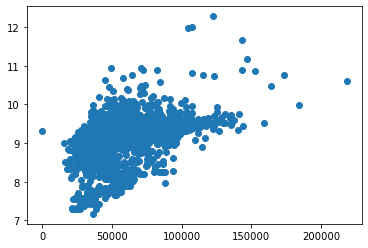

In [92]:
plt.scatter(tdata['LndAc_S'], np.log(tdata['LotArea']))
#vis corr w lot area 

In [93]:
#tdata.LndAc_S[tdata.LndAc_S==0]=tdata.LotArea[tdata.LotArea==]
LA=int(tdata[tdata.LndAc_S==0].LotArea)
tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()
)

<ipython-input-93-d0741030846e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[tdata.LndAc_S==0]=round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean()


In [94]:
list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())

[79,
 109,
 404,
 495,
 558,
 680,
 683,
 895,
 1088,
 1204,
 1346,
 1516,
 1578,
 2011,
 2139,
 2168,
 2203,
 2228,
 2323,
 2525,
 2531]

In [95]:
imputedvals=[]
keysofnas=list((tdata.LotArea[((tdata.LndAc_S.isna()))]).keys())
for i in range(sum(tdata.LndAc_S.isna())):
    LA=tdata.loc[keysofnas[i],'LotArea']
    imputedvals.append(round(tdata[(tdata.LotArea>LA*.9) & (tdata.LotArea<LA*1.1)].LndAc_S.mean())
    )  

In [96]:
tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals

<ipython-input-96-90775d9f79f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.LndAc_S[((tdata.LndAc_S.isna()))]=imputedvals


In [97]:
tdata.loc[109,'LndAc_S']

54033.0

## OthAc_S
-we need to drop either this or lndac_s asap due to corr- didnt even need a test just visually 


In [98]:
sum((tdata.OthAc_S.isna()) )

21

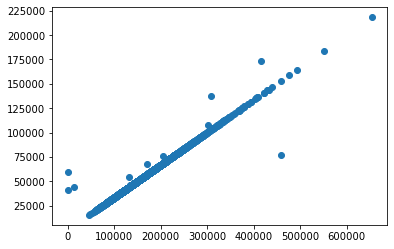

In [99]:
plt.scatter(tdata['OthAc_S'], (tdata['LndAc_S']))

In [100]:
tdata=tdata.drop(columns='OthAc_S')

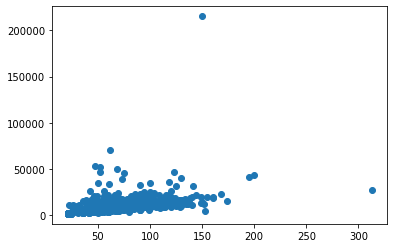

In [101]:
plt.scatter(tdata['LotFrontage'], (tdata['LotArea']))


In [108]:

tdata=tdata.drop(columns='GarageType')
tdata=tdata.drop(columns='GarageFinish')


In [109]:
#list(tdata.columns)

['Unnamed: 0',
 'PID',
 'GrLivArea',
 'SalePrice',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'GeoRefNo',
 'Prop_Addr',
 'SchD_S',
 'LndAc_S',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageFinish_Fin',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'UnpavedDrive',
 'WoodDeckBinary',
 'HasPorch',
 'FenceBinary',
 'OverallCondBinary']